In [48]:
PATH_PREFIX = '../../../'
import sys
sys.path.append(PATH_PREFIX)

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import math
import yaml
import csv
from utils.plot import *
from utils.fitness_controller import FitnessController
from compress_optim import CompressConfig, load_comp_config, fit_from_vals

In [50]:
NET_TYPE = 'relu'
PREC = 'f4'
SAVE_PLOTS = True
SAVE_PLOTS_LOC = os.path.join(PATH_PREFIX, 'results/graphs/')
SAVE_PLOT_ID = f'{NET_TYPE}_{PREC}_locked'

RANGE_FILE = os.path.join(PATH_PREFIX, f'models/lenet/saves/lenet_{NET_TYPE}_layer_perf_{PREC}.csv')

file_content:list[list] = []

# load file contents
if os.path.isfile(RANGE_FILE):
    with open(RANGE_FILE) as f:
        reader = csv.reader(f)
        for row in reader:
            file_content.append([])
            for item in row:
                file_content[-1].append(eval(item))

len(file_content[0])

50

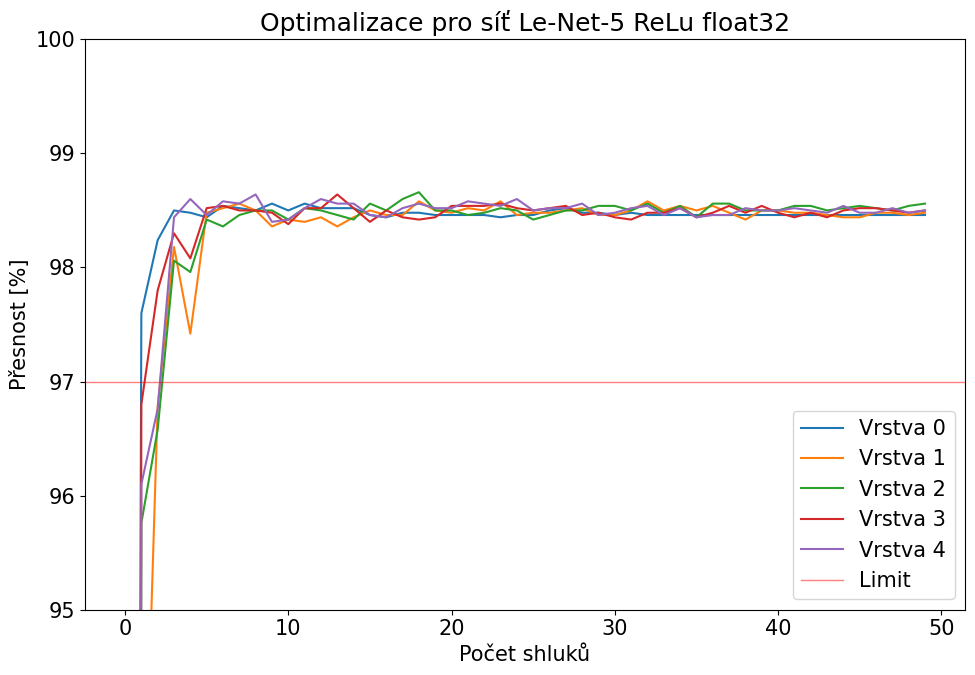

In [51]:
plt.figure(figsize=(10,7))
plt.rc('font', size=15)
for i, layer in enumerate(file_content):
    plt.plot(np.array([x[1] for x in layer]) * 100, label=f'Vrstva {i}')
plt.axhline(y=97, linewidth=1, color='r', alpha=0.5, label='Limit')
plt.legend()
plt.xlabel('Počet shluků')
plt.ylabel('Přesnost [%]')
plt.title(f'Optimalizace pro síť Le-Net-5 {"ReLu" if NET_TYPE == "relu" else "Tanh"} {"float32" if PREC == "f4" else ( "float16" if PREC == "f2" else "float8")}')
plt.tight_layout()
plt.ylim(95, 100)

if SAVE_PLOTS:
    os.makedirs(os.path.join(SAVE_PLOTS_LOC, 'range_opt'), exist_ok=True)
    plt.savefig(os.path.join(SAVE_PLOTS_LOC, 'range_opt' ,f'layer_perf_{SAVE_PLOT_ID}.pdf'))

In [52]:
for layer in file_content:
    print(len([x for x in layer if x[1] > 0.97]))

49
47
47
48
47
